In [1]:
%cd /content/drive/MyDrive/Colab/diffusion/minDiffusion_cloneofsimo

/content/drive/MyDrive/Colab/diffusion/minDiffusion_cloneofsimo


In [2]:
import torch
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import numpy as np

In [3]:
def min_max_norm_image(x:torch.tensor):
    """
    Returns the min-max normalization per image in the
    batch instead of over the entire batch of images.
    """
    b = x.shape[0]
    x_min = x.view(b, -1).min(dim=1).values[:, None, None, None]
    x_max = x.view(b, -1).max(dim=1).values[:, None, None, None]
    return (x - x_min) / (x_max - x_min)

In [4]:
tf = transforms.Compose(
    [transforms.Pad(2),transforms.ToTensor()] #, transforms.Normalize((0.5,), (0.5,))
)

dataset = MNIST(
    "/content/drive/MyDrive/Colab/data",
    train=True,
    download=True,
    transform=tf,
)

In [5]:
len(dataset)

60000

In [7]:
dataset_split_len=50000 #60000
rndsampler=torch.randint(1,len(dataset),size=(dataset_split_len,))
#torch.save(rndsampler,f'./rndsampler_{dataset_split_len}.pt')
#rndsampler=torch.load(f'./rndsampler_{dataset_split_len}.pt')

In [8]:
dataloader = DataLoader(dataset, batch_size=128, sampler=rndsampler)

In [9]:
len(dataloader)

391

In [10]:
imglist=[]
for batch,label in dataloader:
    x = min_max_norm_image(batch) # between [0,1]
    x = (x * 255).clamp(0,255).to(torch.uint8)
    x = x.permute(0,2,3,1)
    x = x.contiguous()
    imglist.append(x.cpu().numpy())

imglist=np.concatenate(imglist,axis=0)
ref_path=f'./ref_batch/mnist2_{dataset_split_len}.npz'
np.savez(ref_path,imglist)

In [11]:
arr=np.load(ref_path)
arr.files

['arr_0']

In [13]:
arr['arr_0'].shape

(50000, 32, 32, 1)

In [14]:
arr_3channel=np.repeat(arr['arr_0'],3,axis=3)
arr_3channel.shape

(50000, 32, 32, 3)

In [15]:
np.savez('./ref_batch/mnist2_3channel_50000.npz',arr_3channel)

In [ ]:
np.min(arr['arr_0'][0])

0

In [ ]:
from PIL import Image
import os
def npz_to_png(npz_path,dir_path):
    # Load the .npz file
    data = np.load(npz_path)
    # Extract the image data from the .npz file
    image_data = data['arr_0']

    for i in range(image_data.shape[0]): # for each image
        image = image_data[i,:,:,0]
        image = Image.fromarray(image)
        path = os.path.join(dir_path, f"{str(i)}.png")
        image.save(path)

In [ ]:
npz_to_png(ref_path,'./ref_batch/png_200/')

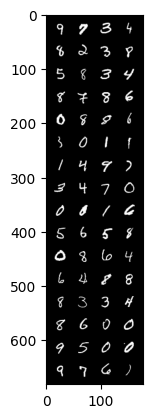

In [ ]:
import matplotlib.pyplot as plt

x=arr['arr_0'][:64] # NWHC
x=torch.from_numpy(x.transpose(0,3,1,2)) #NCWH
x.to(torch.uint8)
xgrid=make_grid(x,nrow=4,padding=10)
xgrid.shape
plt.imshow(xgrid.permute(1,2,0))

In [24]:
tf = transforms.Compose(
    [transforms.Pad(2),transforms.RandomRotation(10),transforms.ToTensor()] #, transforms.Normalize((0.5,), (0.5,))
)

dataset = MNIST(
    "/content/drive/MyDrive/Colab/data",
    train=True,
    download=True,
    transform=tf,
)

In [25]:
dataset_split_len=50000 #60000
rndsampler=torch.randint(1,len(dataset),size=(dataset_split_len,))
#torch.save(rndsampler,f'./rndsampler_{dataset_split_len}.pt')
#rndsampler=torch.load(f'./rndsampler_{dataset_split_len}.pt')

In [26]:
dataloader = DataLoader(dataset, batch_size=128, sampler=rndsampler)

In [27]:
imglist=[]
for batch,label in dataloader:
    x = min_max_norm_image(batch) # between [0,1]
    x = (x * 255).clamp(0,255).to(torch.uint8)
    x = x.permute(0,2,3,1)
    x = x.contiguous()
    imglist.append(x.cpu().numpy())

imglist=np.concatenate(imglist,axis=0)
ref_path=f'./ref_batch/mnist_rndRotation10_{dataset_split_len}.npz'
np.savez(ref_path,imglist)

In [28]:
arr=np.load(ref_path)
arr.files

['arr_0']

In [29]:
arr['arr_0'].shape

(50000, 32, 32, 1)

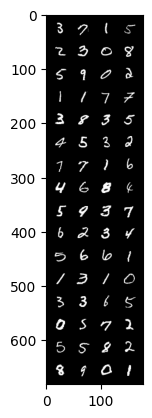

In [21]:
import matplotlib.pyplot as plt

x=arr['arr_0'][:64] # NWHC
x=torch.from_numpy(x.transpose(0,3,1,2)) #NCWH
x.to(torch.uint8)
xgrid=make_grid(x,nrow=4,padding=10)
xgrid.shape
plt.imshow(xgrid.permute(1,2,0))

In [30]:
arr_3channel=np.repeat(arr['arr_0'],3,axis=3)
arr_3channel.shape

(50000, 32, 32, 3)

In [31]:
np.savez('./ref_batch/mnist_rndRotation10_3channel_50000.npz',arr_3channel)